<a href="https://colab.research.google.com/github/cohanra/main/blob/main/Bio_PDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir=rtl> <p> <h1> <b> کار با ساختارهای سه بعدی پروتئین در پایتون </b> </h1> </p>

<div dir=rtl> <p> Bio.PDB یک ماژول Biopython است که با استفاده از آن می توان با ساختارهای بلوری ماکرومولکول های بیولوژیکی کار کرد. Bio.PDB دارای یک کلاس PDBParser است که یک شی ساختار را تولید می کند و با استفاده از آن می توان به داده های اتمی موجود در فایل شیء براحتی دسترسی پیدا کرد. </p>

<div dir=rtl> <p> <h1> نمایش ساختار سه بعدی پروتئین ها

 <div dir=rtl> - طرح کلی یک شی ساختار از معماری به اصطلاح SMCRA (ساختار=> مدل => زنجیره => مانده => اتم) پیروی می کند:


* یک ساختار از مدل ها تشکیل شده است.
* یک مدل متشکل از زنجیره ها است.
* یک زنجیره از باقی مانده ها تشکیل شده است.
* یک باقی مانده از اتم ها تشکیل شده است.



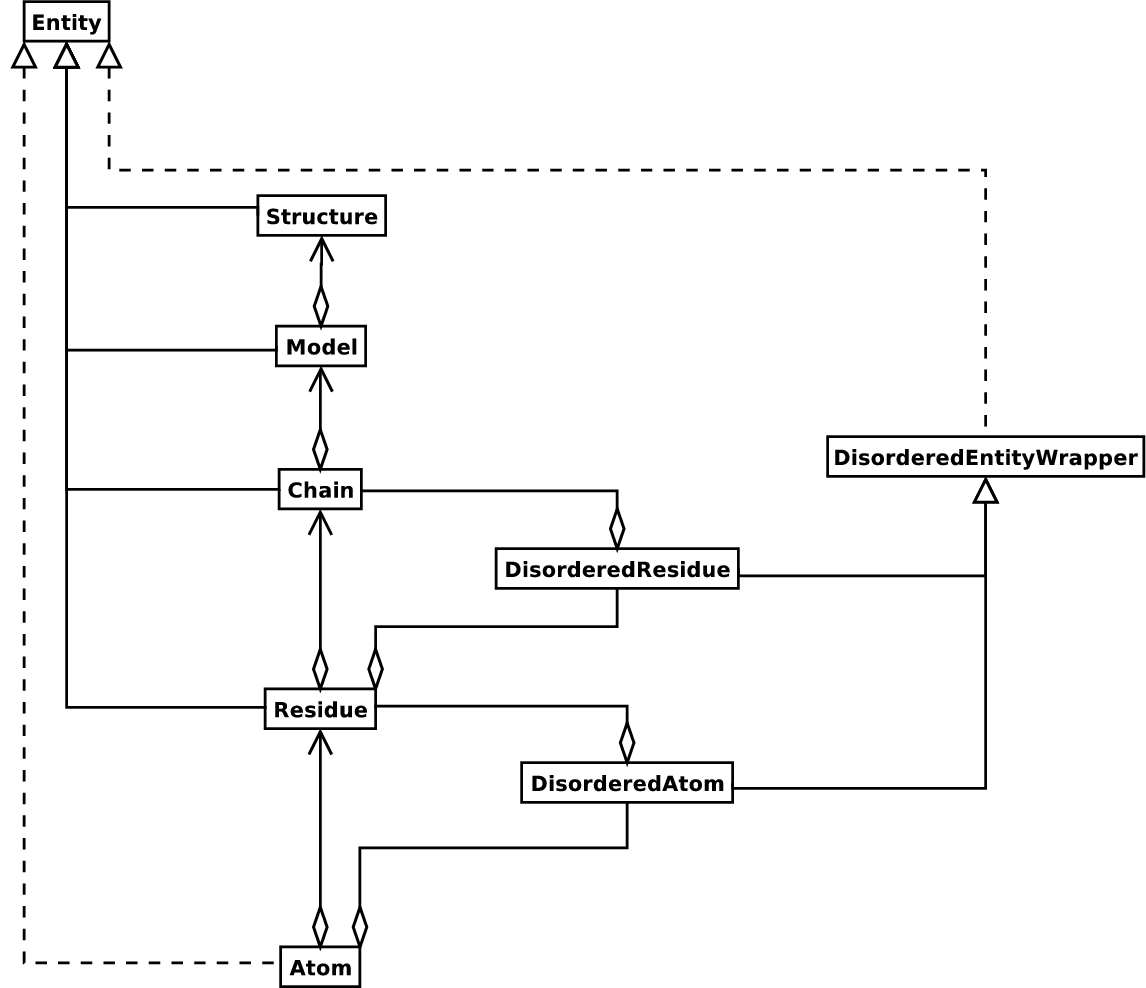

<div dir=rtl> <p> شی ساختار در بالای سلسله مراتب قرار دارد. این روشی است که بسیاری از زیست شناسان ساختاری / بیوانفورماتیسین ها درباره ساختار می اندیشند و روشی ساده اما کارآمد را برای کار با ساختار ارائه می دهد. ساختار، مدل، زنجیره و باقی مانده همه زیر کلاس های کلاس پایه Entity هستند. </p>

<div dir=rtl> <h1> نصب بسته Biopython

<div dir =rtl><p> ابتدا Biopython را بر روی سیستم خود نصب می کنیم. </p></div>

In [ ]:
pip install Bio

<div dir =rtl>برای آنکه مطمئن شویم که بسته درست نصب شده است نسخه آن را با کد زیر بررسی می کنیم:

In [ ]:
import Bio
print(Bio.__version__)

<div dir=rtl> <h1> خواندن فایل های PDB

<div dir=rtl>برای تجزیه تحلیل فایل های PDB پروتئین ابتدا یک شی PDBParser ایجاد می کنیم:

In [ ]:
from Bio.PDB.PDBParser import PDBParser
parser = PDBParser(PERMISSIVE=1)

<div dir=rtl> آرگومان PERMISSIVE مشکلات رایج مرتبط با فایل های PDB را نادیده می گیرد. اما توجه داشته باشید در این حالت برخی از اتم ها و یا باقی مانده ها از دست خواهند رفت.

<div dir=rtl> سپس با معرفی فایل سه بعدی پروتئین به شی PD PDBParser ، یک فایل تجزیه کننده PDB  ایجاد می شود. فایل در مثال حاضر fat.pdb نام دارد.

<div dir=rtl> ابتدا فایل سه بعدی پروتئین را دانلود می کنیم:

In [ ]:
!wget "https://raw.githubusercontent.com/cohanra/main/main/1fat.pdb"

<div dir=rtl> سپس فایل شی ساختار را با استفاده از PDBparser ایجاد می نماییم:

In [ ]:
structure_id = "1fat"
filename = "1fat.pdb"
structure = parser.get_structure(structure_id, filename)

<DIV DIR=RTL> فایل شی ساختار دارای صفتی به نام header است که در واقع یک دیکشنری پایتون است که حاوی رکوردهای سرصفحه و مقادیر آنها می باشد.

In [ ]:
header_dict=structure.header
header_dict

<div dir=rtl> <p> کلیدهای موجود عبارتند از: </p>
<div dir=ltr> <p> 

* head </n> </p>
* deposition_date </n> </p>
* release_date </n> </p>
* structure_method </n> </p>
* resolution </n> </p>
* structure_reference </n> </p>
* journal_reference </n> </p>
* author </n> </p>
* compound </n> </p>
* has_missing_residues </n> </p>
* missing_residues </n> </p>

<div dir=rtl> می توانیم هر یک از اطلاعات ذخیره شده در سر صفحه فایل PDB را با استفاده از ایندکس کردن بدست آوریم:

In [ ]:
resolution = structure.header["resolution"]
resolution

In [ ]:
keywords = structure.header["keywords"]
keywords

In [ ]:
head = structure.header["head"]
head

<div dir=rtl> این دیکشنری همچنین می تواند بدون ایجاد یک شیء ساختار، مستقیماً از فایل PDB با استفاده از کد زیر بدست آید:

In [ ]:
from Bio.PDB import parse_pdb_header
with open(filename, "r") as handle:
 header_dict = parse_pdb_header(handle)

In [ ]:
header_dict

<div dir=rtl> <h1> نوشتن فایل های PDB

<div dir=rtl> برای این کار از کلاس PDBIO استفاده می کنیم.

In [ ]:
from Bio.PDB import PDBParser
from Bio.PDB.PDBIO import PDBIO
parser = PDBParser()
structure = parser.get_structure("1fat", "1fat.pdb")
io=PDBIO()
io.set_structure(structure)
io.save("out.pdb")

<div dir=rtl> البته نوشتن قسمت های خاصی از یک ساختار نیز با استفاده از ()PDBIO امکان پذیر است. مثلا استخراج اطلاعات مربوط به باقیمانده گلایسین به روش زیر انجام می گیرد:

In [ ]:
Select = Bio.PDB.Select
class GlySelect(Select):
    def accept_residue(self, residue):
        if residue.get_resname() == "GLY":
            return 1
        else:
            return 0

io = PDBIO()
io.set_structure(structure)
io.save("gly_only.pdb", GlySelect())

<div dir=rtl> برای دستیابی به قسمت های مختلف PDB می توانید از کدهای زیر استفاده نمایید:
<div dir=ltr>

* accept_model(model) </P>
* accept_chain(chain) </p>
* accept_residue(residue)</p>
* accept_atom(atom)

<div dir=rtl> مثلا برای دستیابی به زنجیره خاصی از PDB ابتدا کلاس ChainSelect را ایجاد می نماییم و سپس با استفاده از ()PDBIO آن را به صورت فایل PDB می نویسیم:

In [ ]:
Select = Bio.PDB.Select
class ChainSelect(Select):
    def accept_chain(self, chain):
        if chain.get_id() == "A":
            return 1
        else:
            return 0

io = PDBIO()
io.set_structure(structure)
io.save("ChainA_only.pdb", ChainSelect())

<div dir=rtl> مثلا برای دستیابی به اتم خاصی از PDB ابتدا کلاس AtomSelect را ایجاد می نماییم و سپس با استفاده از ()PDBIO آن را به صورت فایل PDB می نویسیم:

In [ ]:
Select = Bio.PDB.Select
class AtomSelect(Select):
    def accept_atom(self, atom):
        if atom.get_name() == "CA":
            return 1
        else:
            return 0

io = PDBIO()
io.set_structure(structure)
io.save("CA_only.pdb", AtomSelect())

<div dir=rtl> <h1>پیمایش از طریق یک شی ساختار:

<div dir=rtl> با استفاده از کد زیر یک فایل PDB را می توان تجزیه نمود و اطلاعات برخی از مدل ها، زنجیره ها، باقیمانده ها و یا اتم ها را استخراج کرد:

In [ ]:
from Bio.PDB.PDBParser import PDBParser
parser = PDBParser()
structure = parser.get_structure("1fat", "1fat.pdb")
model = structure[0]
chain = model["A"]
residue = chain[1]
atom = residue["CA"]
print(model,chain,residue,atom)

<div dir=rtl> <h2> مدل

<div dir=rtl> برای بدست آوردن اولین مدل از یک شی Structure، از کد زیر استفاده کنید:

In [ ]:
first_model = structure[0]
first_model

<div dir=rtl> <p> نکته: ساختار شامل تعدادی مدل است. بیشتر ساختارهای بلوری حاصل از پراکنش اشعه X (اما نه همه) حاوی یک مدل واحد هستند، در حالی که ساختارهای NMR معمولاً از چندین مدل تشکیل شده اند. اختلال در ساختارهای بلوری نیز می تواند منجر به چندین مدل شود.

<div dir=rtl> <h2> زنجیره

<div dir=rtl> شناسه یک شی زنجیره (chain)، از شناسه زنجیره موجود در فایل PDB مشتق شده است و یک کاراکتر واحد است (به طور معمول یک حرف). هر زنجیره در یک شی مدل یک شناسه منحصر به فرد دارد. به عنوان مثال ، برای دریافت شی Chain با شناسه "A" از یک شی مدل، از کد زیر استفاده کنید:

In [ ]:
chain.get_id()

<div dir=rtl> <h2> باقیمانده

<div dir=rtl> شناسه باقیمانده یک تاپل با سه عنصر است:


1.  hetfield: علامت "W" در مورد یک مولکول آب، علامت "H_" و به دنبال آن نام باقی مانده برای سایر باقیمانده های هترو (به عنوان مثال "H_GLC" در مورد یک مولکول گلوکز) و علامت خالی برای اسیدهای آمینه و اسیدهای نوکلئیک استاندارد.
2. شناسه توالی (resseq): یک عدد صحیح است که موقعیت باقیمانده را در زنجیره توصیف می کند (به عنوان مثال: 100).
3. کد درج (icode): گاهی اوقات از کد درج برای حفظ یک طرح شماره گذاری باقیمانده مطلوب استفاده می شود. یک جهش درج کننده Ser 80 (وارد شده به عنوان مثال بین Thr 80 و باقی مانده Asn 81) می تواند به عنوان مثال دارای شناسه های توالی و کدهای درج به شرح زیر است: Thr 80 A، Ser 80 B، Asn 81. به این ترتیب ، طرح شماره گذاری بقایا با ساختار نوع اولیه هماهنگ می ماند.



In [ ]:
residue=chain[(" ", 100, " ")]
residue

<div dir=rtl> در تمام سطوح سلسله مراتب SMCRA، می توانید یک شناسه کامل نیز استخراج کنید. شناسه کامل یک تاپل است که تمام شناسه ها را از شی بالا (ساختار) تا شی فعلی شروع می کند. شناسه کامل برای یک شی Residue به عنوان مثال چیزی شبیه به این است:

In [ ]:
full_id = residue.get_full_id()
full_id

<div dir=rtl> که در این مورد تاپل حاصله مربوط به موارد زیر است:

<p> ساختار با شناسه "1fat"

مدل با شناسه 0

زنجیره ای با شناسه "A"

باقمانده با شناسه ("" ، 100 ، "")

<div dir=rtl> شما همچنین می توانید با استفاده از کد زیر باقیمانده 10 را در متغیر res10 بازیابی و ذخیره نمایید:

In [ ]:
res10 = chain[10]
res10

<div dir=rtl> کد زیر نام باقیمانده را بر می گرداند:

In [ ]:
res10.get_resname()

<div dir=rtl> ساختارهای disordered، ساختارهای فقدان نظم را نشان می دهند. به عنوان مثال، در یک باقیمانده ممکن است یک اتم به طور تصادفی بین دو مختصات فضایی توزیع شود. این بدان معناست که بلورساز دو مجموعه مختصات را برای آن اتم گزارش می کند. در برخی موارد، دو مختصات به طور مساوی اشغال می شوند. در موارد دیگر، یک مختصات بیشتر و یک مختصات کمتر اشغال می شوند. اختلال می تواند بیش از دو مکان را درگیر کند و همچنین می تواند یک مولکول کامل را درگیر کند.
<div dir=rtl>کد زیر اگر باقیمانده دارای اتمهای نامنظم (یا به اصطلاح disordered) باشد، عدد یک و در غیر اینصورت عدد صفر را برمی گرداند:

In [ ]:
res10.is_disordered()

<div dir=rtl>شما می توانید با استفاده از کد زیر لیست تمام باقیمانده های یک ساختار را بدست آورید:

In [ ]:
residues = model.get_residues()
for residue in residues:
   print(residue)

<div dir=rtl> <h1> اتم

<div dir=rtl> شیء Atom داده های مرتبط با یک اتم را ذخیره می کند و زیر مجموعه ای ندارد. شناسه یک اتم، نام آن اتم است (به عنوان مثال "OG" برای اکسیژن زنجیره جانبی باقیمانده سرین). شناسه Atom باید در یک Residue منحصر به فرد باشد.

<div dir=rtl> با استفاده از ایندکس نمودن، اتم مورد نظر را انتخاب می کنیم:

In [ ]:
atom = structure[0]["A"][100]["CA"]
atom

<div dir=rtl> سپس با استفاده از متدهای زیر می توانیم به مشخصات آن دسترسی پیدا کنیم:

In [ ]:
atom.get_name()       # نام اتم
atom.get_id()         # id (همان نام اتم را بر می گرداند)
atom.get_coord()      # مختصات فضایی اتم به صورت یک آرایه تک بعدی
atom.get_vector()     # مختصات فضایی اتم به صورت یک شی وکتور
atom.get_bfactor()    # B فاکتور 
atom.get_occupancy()  # occupancy

In [ ]:
atom.get_name()

In [ ]:
atom.get_id()

In [ ]:
atom.get_coord()

In [ ]:
atom.get_vector()

In [ ]:
atom.get_bfactor()

<div dir=rtl>Factor B: در فایل های PDB کنفورماسیون های مختلف با "ALT" علامت گذاری شده اند. اعداد موجود در ستون آخر فایل PDB را فاکتورهای دما یا فاکتور B برای هر اتم در ساختار می نامند. عامل B جابجایی موقعیت های اتمی را از یک مقدار میانگین (mean-square displacement) توصیف می کند.

In [ ]:
atom.get_occupancy()

<div dir=rtl> Occupancy: مختصات x، y، z با یک عدد دنبال می شوند که در بیشتر موارد 1 است. به آن Occupancy گفته می شود. گاهی اوقات زنجیره جانبی یک اسید آمینه به دلیل انعطاف پذیری موضعی ممکن است دو یا چند شکل متفاوت داشته باشد. در این حالت کریستالوگراف کلیه کنفورماسیون ها را ایجاد می کند و برای هر اتم پارامتری به نام اشغال تصفیه می کند (عدد یک برای Occupancy کامل و کمتر از یک برای Occupancy های کمتر ولی مجموع آن ها همیشه برابر 1 می شود). در پرونده های PDB این ترکیبات جایگزین با "ALT" علامت گذاری شده اند.

<div dir=rtl>شما می توانید با استفاده از کد زیر لیست تمام اتم های یک ساختار را بدست آورید:

In [ ]:
atoms = structure.get_atoms()
for atom in atoms:
  print(atom)

<div dir=rtl> تمام باقیمانده های هترو را با استفاده از کد زیر می توانیم به صورت پشت سرهم به صورت زنجیره ای چاپ کنیم:

In [ ]:
for residue in chain.get_list():
    residue_id = residue.get_id()
    hetfield = residue_id[0]
    if hetfield[0]=="H":
      print(residue_id)

<div dir=rtl> با استفاده از کد زیر می توان مختصات همه اتم های CA در ساختار را با فاکتور B بزرگتر از 50 چاپ کنیم:

In [ ]:
for model in structure.get_list():
 for chain in model.get_list():
  for residue in chain.get_list():
   if residue.has_id("CA"):
    ca = residue["CA"]
   if ca.get_bfactor() > 50.0:
    print(ca.get_coord())

<div dir=rtl> با استفاده از کد زیر می توان تمام باقیمانده هایی را که حاوی اتم های بی نظم هستند چاپ کنیم:

In [ ]:
for model in structure.get_list():
  for chain in model.get_list():
    for residue in chain.get_list():
     if residue.is_disordered():
      resseq = residue.get_id()
      resname = residue.get_resname()
      model_id = model.get_id()
      chain_id = chain.get_id()
      print(model_id, chain_id, resname, resseq)

<div dir=rtl> که در این مورد چیزی چاپ نمی شود که بدین معنی می باشد که در ساختار مورد نظر باقیمانده دارای اتم های بی نظم وجود ندارد.

<div dir=rtl> <h3> استخراج توالی آمینواسیدی از یک شی ساختار

<div dir=rtl> استفاده از حلقه و متد PPBuilder برای بدست آوردن توالی آمینواسیدی موجود در یک ساختار PDB:

In [ ]:
from Bio.PDB.PDBParser import PDBParser as parser
from Bio.PDB.Polypeptide import PPBuilder
parser = PDBParser()
structure = parser.get_structure("1fat", "1fat.pdb")
ppb=PPBuilder()
for pp in ppb.build_peptides(structure):
     pp.get_sequence()

<div dir=rtl> دخیره سازی توالی آمینواسیدی در یک متغیر:

In [ ]:
seq = pp.get_sequence().__str__()
seq

<div dir=rtl> ذخیره کردن توالی آمینواسیدی درون فایل متنی به صورت string با استفاده از متد open و with:

In [ ]:
with open("Sequence.txt", "w") as text:
    text.write(seq)

<div dir=rtl> اطمینان از نوشته شدن فایل:

In [ ]:
!cat Sequence.txt

<div dir=rtl> <h1> تحلیل ساختارها

<div dir=rtl> اندازه گیری فواصل بین اتمی:

In [ ]:
# تعریف باقیمانده ها
residue1 = chain[96]
residue2 = chain[98]

# تعریف اتم ها
ca1 = residue1["CA"]
ca2 = residue2["CA"]

# بدست آوردن فاصله اتم ها با استفاده از متد تفریق
distance = ca1-ca2
distance

<div dir=rtl> اندازه گیری زوایای بین اتمی:

In [ ]:
# تعریف اتم اول
atom1 = structure[0]["A"][100]["N"]

# بدست آوردن مختصات اتم اول به صورت وکتور
vector1 = atom1.get_vector()
vector1

In [ ]:
# تعریف اتم دوم
atom2 = structure[0]["A"][100]["CA"]

# بدست آوردن مختصات اتم دوم به صورت وکتور
vector2 = atom2.get_vector()
vector2

In [ ]:
# تعریف اتم سوم
atom3 = structure[0]["A"][100]["O"]

# بدست آوردن مختصات اتم سوم به صورت وکتور
vector3 = atom3.get_vector()
vector3

In [ ]:
# محاسبه زاویه بین اتم های تعریف شده
angle = Bio.PDB.vectors.calc_angle(vector1, vector2, vector3)
angle

<div dir=rtl> اندازه گیری زاوایای تورشنال یا دهیدرال:

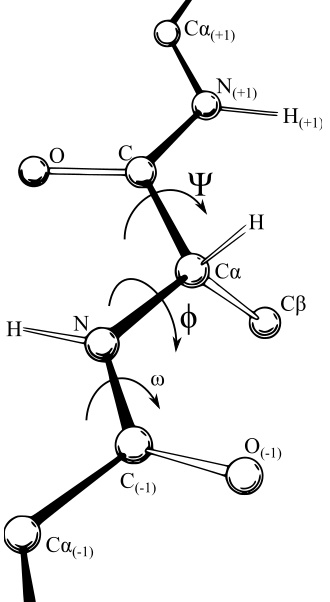

<div dir=rtl>
<p> انواع زوایای دی هیدرال: </p>
<div dir=ltr>
ω (omega) is the angle in the chain Cα − C' − N − Cα

φ (phi) is the angle in the chain C' − N − Cα − C'

ψ (psi) is the angle in the chain N − Cα − C' − N

In [ ]:
# تعریف اتم اول
atom1 = structure[0]["A"][100]["CA"]

# بدست آوردن مختصات اتم اول به صورت وکتور
vector1 = atom1.get_vector()
vector1

In [ ]:
# تعریف اتم دوم
atom2 = structure[0]["A"][100]["C"]

# بدست آوردن مختصات اتم دوم به صورت وکتور
vector2 = atom2.get_vector()
vector2

In [ ]:
# تعریف اتم سوم
atom3 = structure[0]["A"][101]["N"]

# بدست آوردن مختصات اتم سوم به صورت وکتور
vector3 = atom3.get_vector()
vector3

In [ ]:
# تعریف اتم چهارم
atom4 = structure[0]["A"][101]["CA"]

# بدست آوردن مختصات اتم سوم به صورت وکتور
vector4 = atom4.get_vector()
vector4

In [ ]:
# محاسبه زاویه تورشنال بین اتم های تعریف شده
angle = Bio.PDB.vectors.calc_dihedral(vector1, vector2, vector3, vector4)
angle

<div dir=rtl> <h1> نحوه دانلود فایل های سه بعدی پروتئین از پایگاه داده PDB

<div dir=rtl> دانلود فایل سه بعدی پروتئین از پایگاه داده Protein Data Bank و دخیره کردن آن در مسیر تعیین شده:

In [ ]:
import Bio.PDB.PDBList as PDBList
pdb = PDBList()
pdb.retrieve_pdb_file("1EER", file_format="pdb", pdir="PDB_Files")